In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# CARREGANDO BANCO DE DADOS

In [2]:
dados = pd.read_csv("stroke.csv")
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# PRÉ-PROCESSAMENTO DOS DADOS

1. Remoção de linhas nulas
2. Separação dos dados em X (variáveis independentes) e y (variável dependente)
3. Transformação das variáveis categóricas em numéricas (LabelEncoder e OneHotEncoder)
4. Separação em Teste e Treino
5. Normalização

# REMOVENDO DADOS NULOS EM BMI

In [3]:
dados = dados.dropna()
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# SEPARANDO OS DADOS INDEPENDENTES E DEPENDENTES

In [4]:
x = dados.iloc[:, 1:-1]
y = dados.iloc[:, -1]
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


# TRANSFORMANDO VARIAVEIS CATEGORICAS BINARIAS EM NUMERICAS

In [5]:
# unique pra descobrir quantos rótulos únicos
colunas = ['ever_married', 'Residence_type'] 

label = LabelEncoder()
x[colunas] = x[colunas].apply(label.fit_transform)

x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked


# TRANSFORMADOS DADOS CAETAGORICOS COM MAIS DE DUAS OPÇÃO

In [6]:
colunas = ['gender', 'work_type', 'smoking_status']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), colunas)], remainder='passthrough')
x = ct.fit_transform(x)
x[0]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,
         1.  , 228.69,  36.6 ])

# AJUSTANDO O NOME DAS COLUNAS

In [7]:
colunas = ['ohe1', 'ohe2', 'ohe3', 'ohe4', 'ohe5', 'ohe6', 'ohe7', 'ohe8', 'ohe9', 'ohe10', 'ohe11', 
           'ohe12', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 
           'avg_glucose_level', 'bmi']
pd.DataFrame(x, columns=colunas)

,ohe1,ohe2,ohe3,ohe4,ohe5,ohe6,ohe7,ohe8,ohe9,ohe10,ohe11,ohe12,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,103.08,18.6
4905,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0
4906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6
4907,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6


# SEPARANDO TREINO E TESTO

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train), len(x_test))

3927 982


# NORMALIZAÇÃO DOS DADOS

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[ 0.83842044, -0.83842044,  0.        , ...,  0.97958197,
        -0.54174921, -0.76951334],
       [ 0.83842044, -0.83842044,  0.        , ..., -1.02084361,
        -0.53157147,  0.93854783],
       [ 0.83842044, -0.83842044,  0.        , ..., -1.02084361,
        -0.73716184, -0.38711158],
       ...,
       [ 0.83842044, -0.83842044,  0.        , ..., -1.02084361,
        -0.96717879, -0.92247404],
       [ 0.83842044, -0.83842044,  0.        , ...,  0.97958197,
         2.28178234, -0.28513778],
       [ 0.83842044, -0.83842044,  0.        , ..., -1.02084361,
        -0.73309074,  0.0080369 ]])

# CRIANDO ARQUETETURA DA REDE NEURAK (MLP)

In [10]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense(units=6, activation='relu')) 
modelo.add(tf.keras.layers.Dense(units=6, activation='relu'))
modelo.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

# TREINANDO MODELO com OTIMIZADOR SGD

In [11]:
modelo.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
sgd = modelo.fit(x_train, y_train, batch_size=32, epochs=100) # tamanho de lote de 32 e 20 épocas.


Epoch 1/100


123/123 [==============================] - 2s 2ms/step - loss: 0.3589 - accuracy: 0.9531
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9587
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9587
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9587
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9587
Epoch 6/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9587
Epoch 7/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9587
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9587
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9587
Epoch 10/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1644 - acc

# OTIMIZADOR ADAM 

In [ ]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense(units=6, activation='relu')) 
modelo.add(tf.keras.layers.Dense(units=6, activation='relu'))
modelo.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
adam = modelo.fit(x_train, y_train, batch_size=32, epochs=20)

# VISUALIZANDO TREINAMENTO

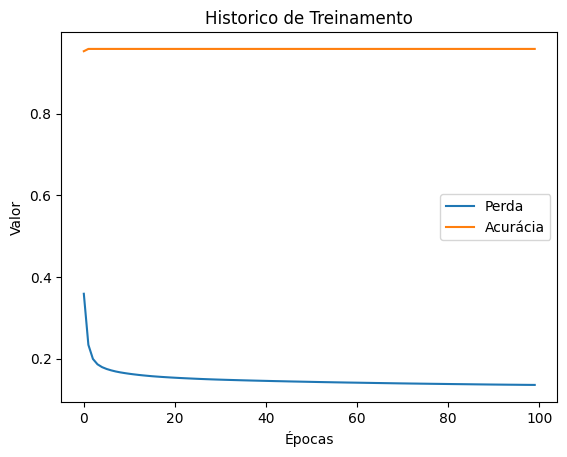

In [12]:
sgd.history.keys()
plt.plot(sgd.history['loss'], label='Perda')
plt.plot(sgd.history['accuracy'], label='Acurácia')

plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Historico de Treinamento')

plt.legend()
plt.show()

# ANALISANDO RESULTADOS

In [13]:
y_pred = modelo.predict(x_test)
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

print(np.concatenate([pred_array, test_array], axis=1))

31/31 [==============================] - 0s 4ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [14]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[935   0]
 [ 47   0]]
0.9521384928716904


In [15]:
dados['stroke'].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64